# Sobel edge detection

# 2.1.1: Sharpening on edge detection

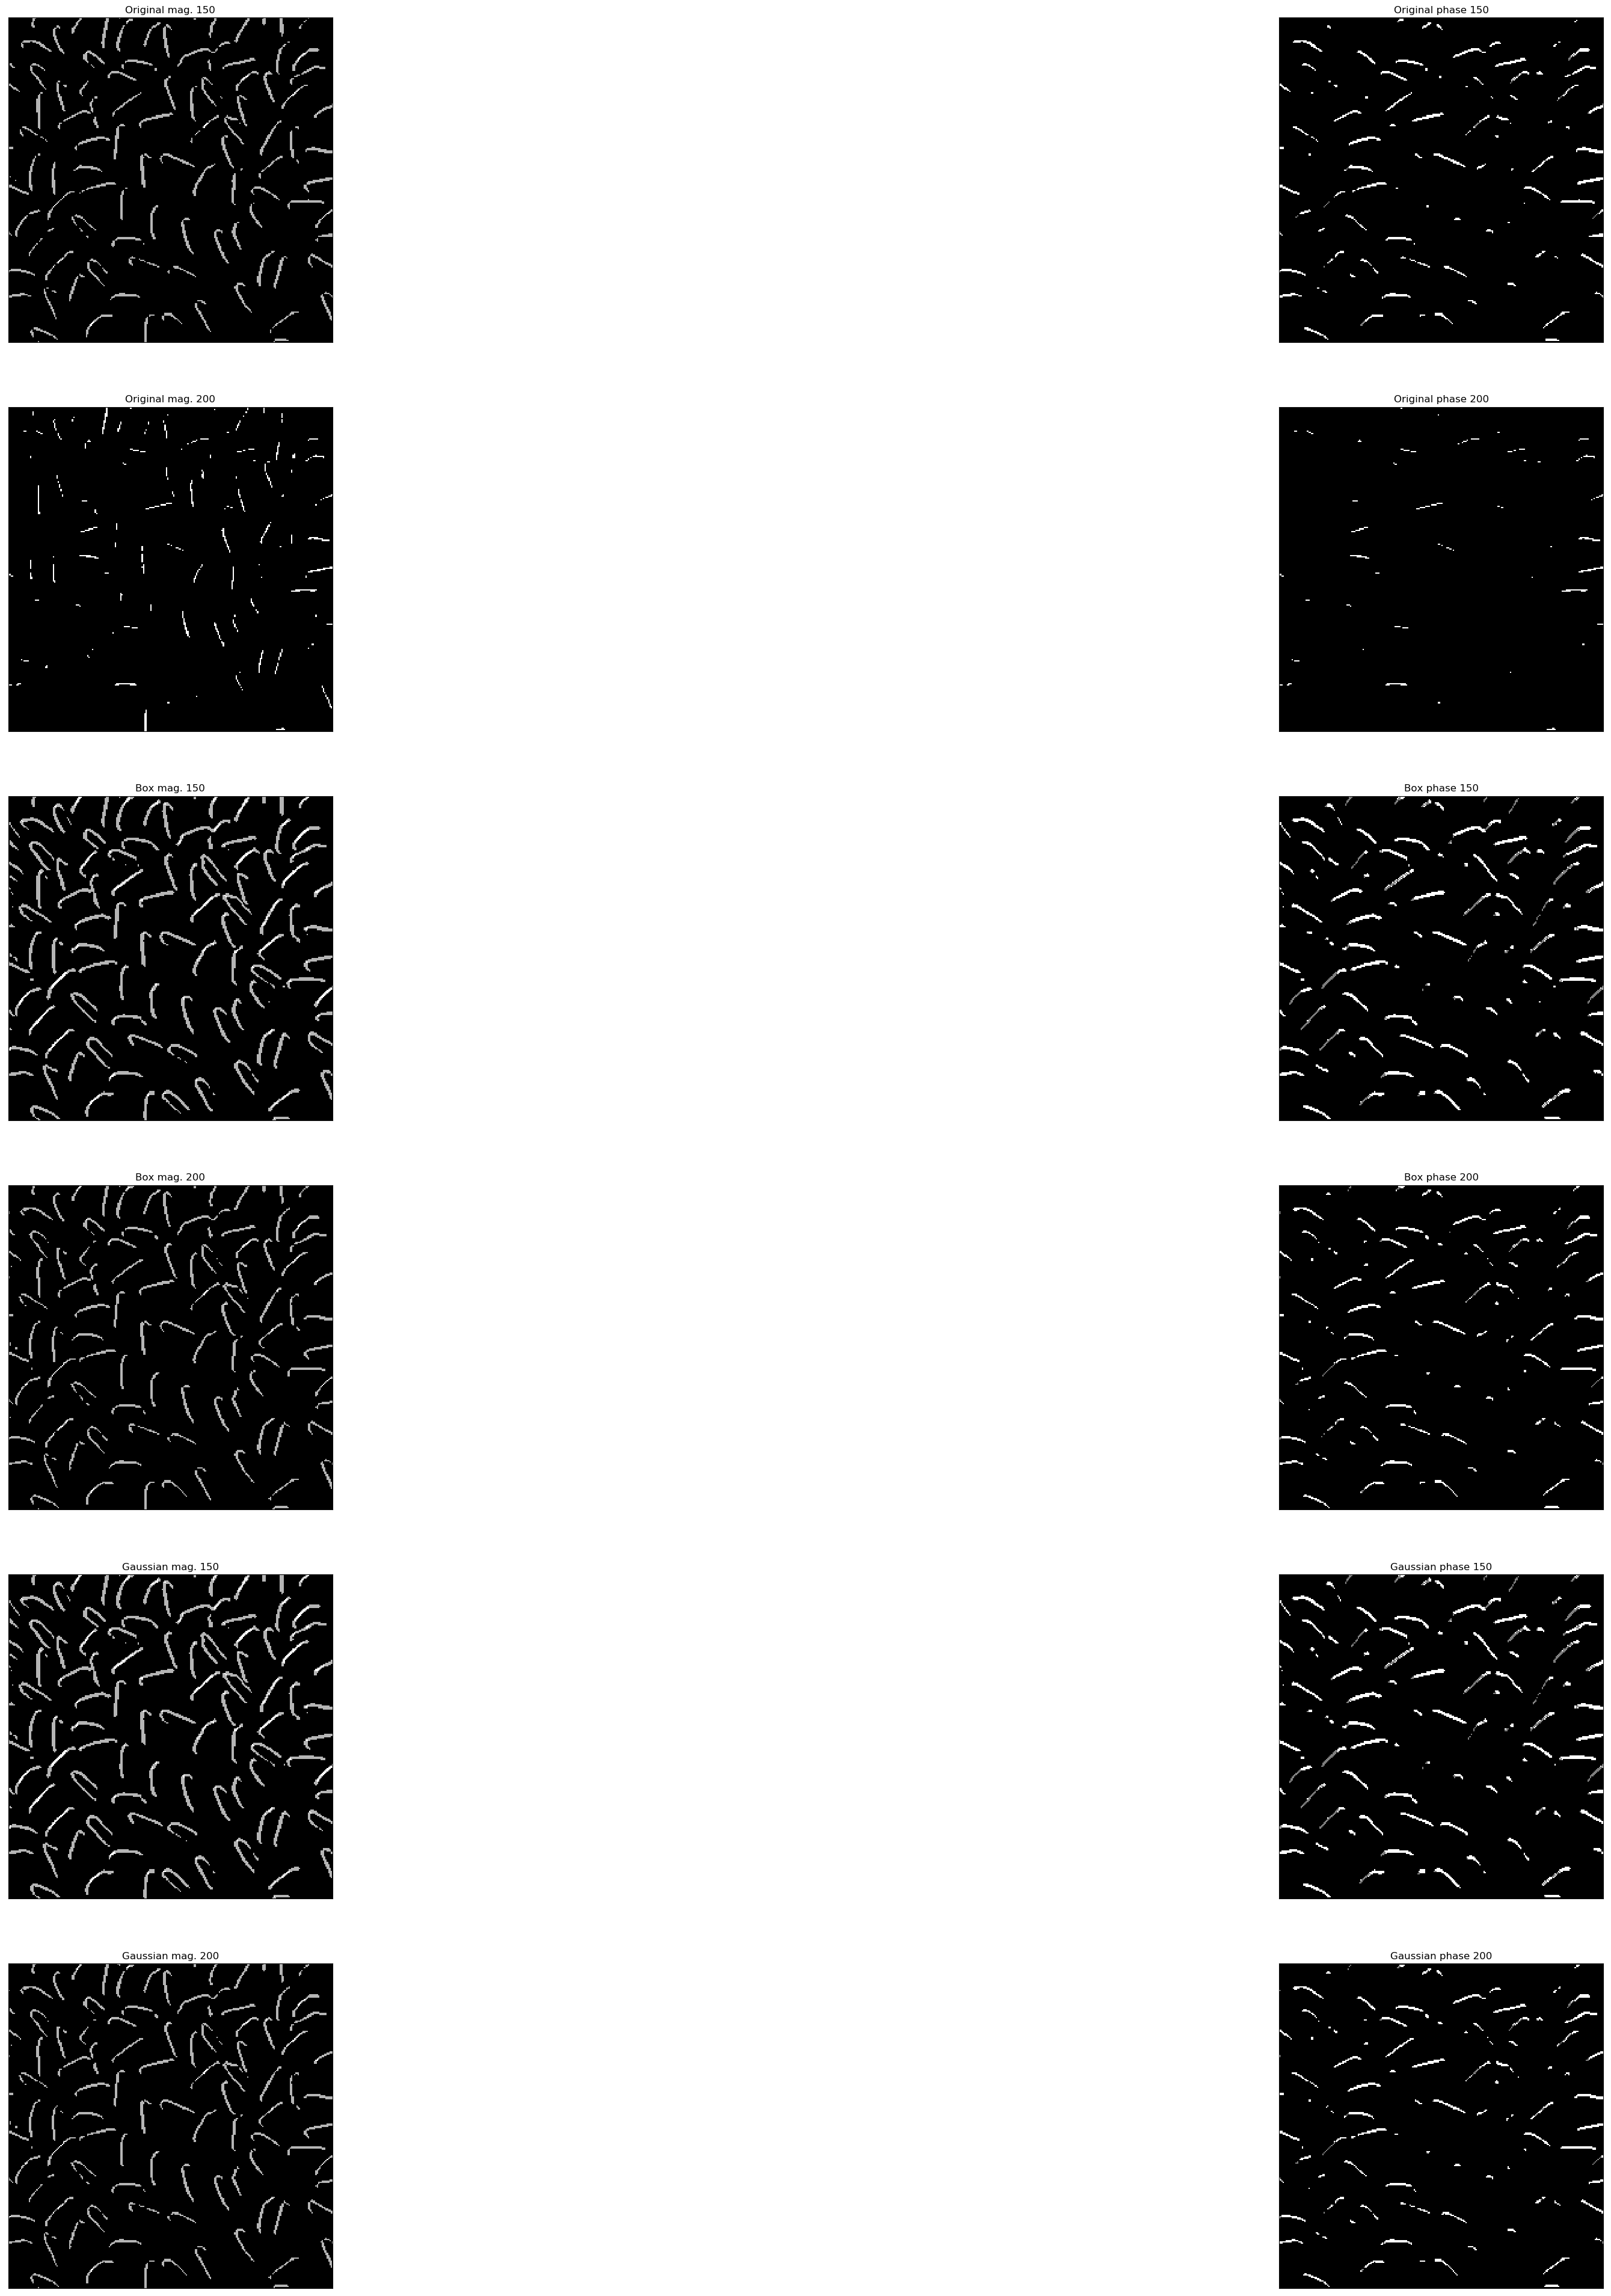

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image as greyscale
imgRice = cv2.imread("rice.png", cv2.IMREAD_GRAYSCALE)

# compute sobel edge detection, threshold 150
og_x_150 = cv2.Sobel(imgRice, cv2.CV_64F, 1, 0, ksize=3)
og_y_150 = cv2.Sobel(imgRice, cv2.CV_64F, 0, 1, ksize=3)
ret,og_x_150 = cv2.threshold(og_x_150, 150, 255, cv2.THRESH_BINARY)
ret,og_y_150 = cv2.threshold(og_y_150, 150, 255, cv2.THRESH_BINARY)

# compute sobel edge detection, threshold 200
og_x_200 = cv2.Sobel(imgRice, cv2.CV_64F, 1, 0, ksize=3)
og_y_200 = cv2.Sobel(imgRice, cv2.CV_64F, 0, 1, ksize=3)
ret,og_x_200 = cv2.threshold(og_x_200, 200, 255, cv2.THRESH_BINARY)
ret,og_y_200 = cv2.threshold(og_y_200, 200, 255, cv2.THRESH_BINARY)


# Sharpening mechanics
# Apply box filter to image 
box_filter = np.ones((5,5), np.float32) / (5*5)
box_filtered_img = cv2.filter2D(imgRice, -1, box_filter)

# Compute Details with box filter and create sharpened image
details_box = imgRice - box_filtered_img
sharpened_box = imgRice + details_box

# Apply gaussian filter to image with var= 2^2
gaussian_blurred = cv2.GaussianBlur(imgRice, (5,5), 4)
details_gaussian = imgRice - gaussian_blurred
sharpened_gaussian = imgRice + details_gaussian

# Perform Sobel Edge detection on sharpened images
ret,box_x_150 = cv2.threshold(cv2.Sobel(sharpened_box, cv2.CV_64F, 1, 0, ksize=3), 150, 255, cv2.THRESH_BINARY)
ret,box_y_150 = cv2.threshold(cv2.Sobel(sharpened_box, cv2.CV_64F, 0, 1, ksize=3), 150, 255, cv2.THRESH_BINARY)
ret,box_x_200 = cv2.threshold(cv2.Sobel(sharpened_box, cv2.CV_64F, 1, 0, ksize=3), 200, 255, cv2.THRESH_BINARY)
ret,box_y_200 = cv2.threshold(cv2.Sobel(sharpened_box, cv2.CV_64F, 0, 1, ksize=3), 200, 255, cv2.THRESH_BINARY)
ret,gaussian_x_150 = cv2.threshold(cv2.Sobel(sharpened_gaussian, cv2.CV_64F, 1, 0, ksize=3), 150, 255, cv2.THRESH_BINARY) 
ret,gaussian_y_150 = cv2.threshold(cv2.Sobel(sharpened_gaussian, cv2.CV_64F, 0, 1, ksize=3), 150, 255, cv2.THRESH_BINARY)
ret,gaussian_x_200 = cv2.threshold(cv2.Sobel(sharpened_gaussian, cv2.CV_64F, 1, 0, ksize=3), 200, 255, cv2.THRESH_BINARY)
ret,gaussian_y_200 = cv2.threshold(cv2.Sobel(sharpened_gaussian, cv2.CV_64F, 0, 1, ksize=3), 200, 255, cv2.THRESH_BINARY)

og_mag_150 = cv2.magnitude(og_x_150, og_y_150)
og_phase_150 = cv2.phase(og_x_150, og_y_150)
og_mag_200 = cv2.magnitude(og_x_200, og_y_200)
og_phase_200 = cv2.phase(og_x_200, og_y_200)
box_mag_150 = cv2.magnitude(box_x_150, box_y_150)
box_phase_150 = cv2.phase(box_x_150, box_y_150)
box_mag_200 = cv2.magnitude(box_x_200, box_y_200)
box_phase_200 = cv2.phase(box_x_200, box_y_200)
gaus_mag_150 = cv2.magnitude(gaussian_x_150, gaussian_y_150)
gaus_phase_150 = cv2.phase(gaussian_x_150, gaussian_y_150)
gaus_mag_200 = cv2.magnitude(gaussian_x_200, gaussian_y_200)
gaus_phase_200 = cv2.phase(gaussian_x_200, gaussian_y_200)

#images = [og_x_150,og_y_150,og_x_200,og_y_200,box_x_150,box_y_150,box_x_200,box_y_200,gaussian_x_150,gaussian_y_150,
#          gaussian_x_200,gaussian_y_200
#         ]
images_total = [og_mag_150,og_phase_150,og_mag_200,og_phase_200,box_mag_150,box_phase_150,box_mag_200,box_phase_200,
                gaus_mag_150,gaus_phase_150,gaus_mag_200,gaus_phase_200
               ] 
titles = ["Original mag. 150","Original phase 150","Original mag. 200","Original phase 200","Box mag. 150", "Box phase 150",
          "Box mag. 200","Box phase 200","Gaussian mag. 150","Gaussian phase 150","Gaussian mag. 200","Gaussian phase 200"
         ]
# Show images
plt.figure(num=None, figsize=(50,50), dpi=100)
for i in range(12):
    plt.subplot(6,2,i+1),plt.imshow(images_total[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

By adding a sharpening filter, it is obvious that the effectiveness of edge detection increases. Comparing for example the gaussian sharpening filter to the unsharpened image at a threshold of 150, the edges are more refined and complete in both the magnitude and phase plots, even at the higher cutoff value of 200.
Comparing both sharpening filters, yet again the gaussian filter is superior to the box filter: The detected edges are fuller and more complete as well as being much smoother. The box filter edges that are detected are much more boxy and even contain gaps where edges were completely eradicated by the filter.

# 2.1.2: Denoising on edge detection

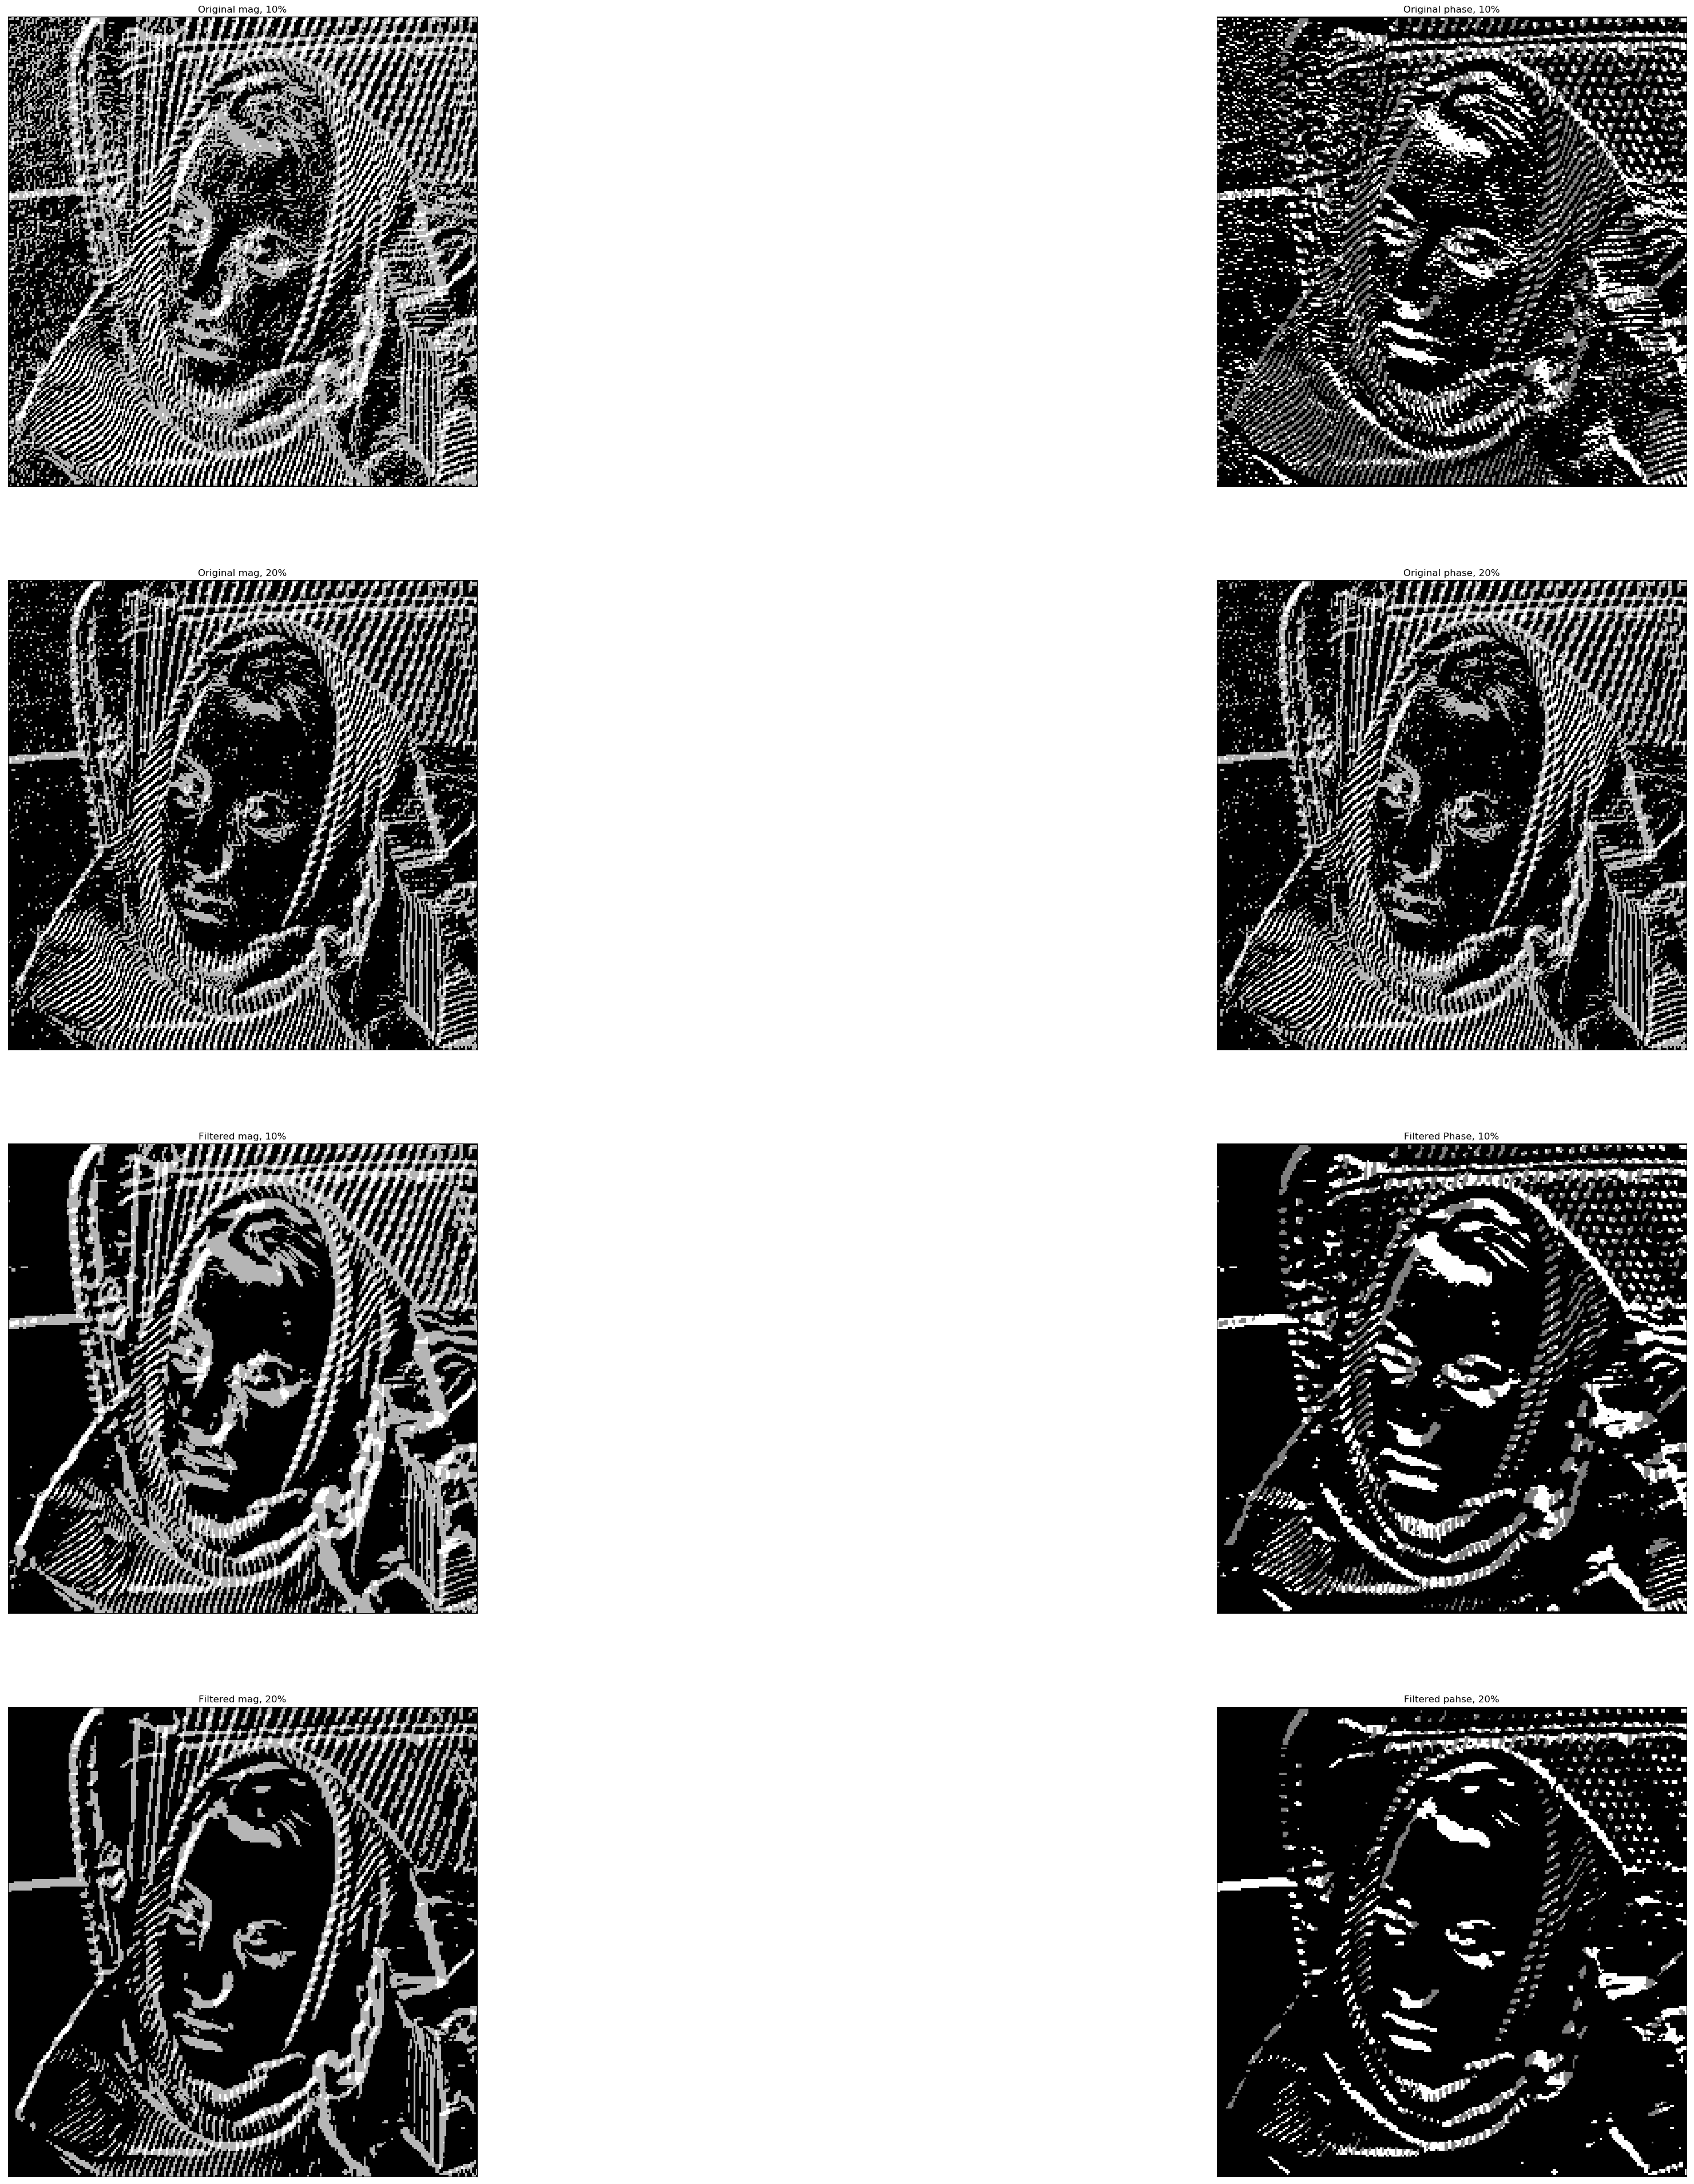

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image as greyscale
imgWoman = cv2.imread("woman.png", cv2.IMREAD_GRAYSCALE)

# Sharpening mechanics
# Apply box filter to image
box_filter = np.ones((3,3), np.float32) / (3*3)
box_filtered_img = cv2.filter2D(imgWoman, -1, box_filter)

max_val_og = np.amax(imgWoman)

# Calculate sobel edges
sobel_x = cv2.Sobel(imgWoman, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(imgWoman, cv2.CV_64F, 0, 1, ksize=3)
sobel_x_filt = cv2.Sobel(box_filtered_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_filt = cv2.Sobel(box_filtered_img, cv2.CV_64F, 0, 1, ksize=3)

max_val_filt = np.amax(box_filtered_img)

thresh_10_og = int(0.1*(max_val_og))
thresh_20_og = int(0.2*(max_val_og))
thresh_10_filt = int(0.1*(max_val_filt))
thresh_20_filt = int(0.2*(max_val_filt))


# Thresholding values
ret, og_threshold_10_x = cv2.threshold(sobel_x, thresh_10_og, 255, cv2.THRESH_BINARY)
ret, og_threshold_10_y = cv2.threshold(sobel_y, thresh_10_og, 255, cv2.THRESH_BINARY)
ret, og_threshold_20_x = cv2.threshold(sobel_x, thresh_20_og, 255, cv2.THRESH_BINARY)
ret, og_threshold_20_y = cv2.threshold(sobel_y, thresh_20_og, 255, cv2.THRESH_BINARY)

ret, filt_10_x = cv2.threshold(sobel_x_filt, thresh_10_filt, 255, cv2.THRESH_BINARY)
ret, filt_10_y = cv2.threshold(sobel_y_filt, thresh_10_filt, 255, cv2.THRESH_BINARY)
ret, filt_20_x = cv2.threshold(sobel_x_filt, thresh_20_filt, 255, cv2.THRESH_BINARY)
ret, filt_20_y = cv2.threshold(sobel_y_filt, thresh_20_filt, 255, cv2.THRESH_BINARY)

# Calculate magnitude and phase
og_10_mag = cv2.magnitude(og_threshold_10_x, og_threshold_10_y)
og_10_phase = cv2.phase(og_threshold_10_x, og_threshold_10_y)
og_20_mag = cv2.magnitude(og_threshold_20_x, og_threshold_20_y)
og_20_phase = cv2.magnitude(og_threshold_20_x, og_threshold_20_y)

filt_10_mag = cv2.magnitude(filt_10_x, filt_10_y)
filt_10_phase = cv2.phase(filt_10_x, filt_10_y)
filt_20_mag = cv2.magnitude(filt_20_x, filt_20_y)
filt_20_phase = cv2.phase(filt_20_x, filt_20_y) 

img = [og_10_mag,og_10_phase,og_20_mag,og_20_phase,filt_10_mag,filt_10_phase,filt_20_mag,filt_20_phase]
titles = ["Original mag, 10%","Original phase, 10%","Original mag, 20%","Original phase, 20%",
         "Filtered mag, 10%","Filtered Phase, 10%", "Filtered mag, 20%","Filtered pahse, 20%"
         ]

# Display images
plt.figure(num=None, figsize=(50,50), dpi=100)
for i in range(8):
    plt.subplot(4,2,i+1),plt.imshow(img[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

Denoising the image goes a long way in increasing the effectiveness of the edge detection, as can be observed from the above results.
First, observe the Original image, with 10% threshold value. Here, edges are detected essentially everywhere where a noisy pixel is found and an contrast can be seen. Such, the edge detection image is peppered with noise particles showing up. 
Next, the Original image with a threshold of 20%. Increasing the threshold value to 20% of the maximum value goes a long way to removing many of the noise particles. However, much noise is still visible and edges are detected where they should not be.
Following this is the box-filtered image. Using the 3x3 box filter, the image was denoised. Using a 10% cutoff value, there are a lot less edges detected using the sobel edge detector and the ones that are detected are truly interest points in the image, such as the edge of the woman's face. However, some light features such as the transition areas around the eyes are not really sharp edges but still show up as detected.
Applying a 20% threshold resolves this issue: Light features are removed and only the truly hard edges are shown in the magnitude and phase plots
